# Wikipedia Classification assignment

- Look here: https://www.doc.ic.ac.uk/~js4416/163/website/nlp/
- take N classes of wikipedia articles (laziest way possible) (for each class – 1000 articles)
- create an autoencoder to compress the articles
- perform classification with typical classifier.

Discussion

- Compare to a classification on plain text
- Compare to PCA

In [1]:
import utils
import getfeatures

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## N classes of wikipedia articles (1000 articles each)

In [4]:
data_dir = 'data'
max_pages = 1000
max_categories = 20

getfeatures.get_features(data_dir, max_pages, max_categories)

data_file = "Wikipedia_{0}_{1}.pkl".format(max_pages, max_categories)

Getting Category:Politics
 oooooooooooooooooooo [100.00%]
Getting Category:Nature
 oooooooooooooooooooo [100.00%]
Getting Category:Culture
 oooooooooooooooooooo [100.00%]
Getting Category:People
 oooooooooooooooooooo [100.00%]
Getting Category:Universe
 oooooooooooooooooooo [100.00%]
Getting Category:Language
 oooooooooooooooooooo [100.00%]
Getting Category:Reference
 oooooooooooooooooooo [100.00%]
Getting Category:Religion
 oooooooooooooooooooo [100.00%]
Getting Category:Life
 oooooooooooooooooooo [100.00%]
Getting Category:Education
 oooooooooooooooooooo [100.00%]
Getting Category:History
 oooooooooooooooooooo [100.00%]
Getting Category:Philosophy
 oooooooooooooooooooo [100.00%]
Getting Category:Sports
 oooooooooooooooooooo [100.00%]
Getting Category:Events
 oooooooooooooooooooo [100.00%]
Getting Category:Geography
 oooooooooooooooooooo [100.00%]
Getting Category:Mathematics
 oooooooooooooooooooo [100.00%]
Getting Category:Science and technology
 oooooooooooooooooooo [100.00%]
Gettin

## Initial data preparation

Before compressing and classifying the following preparation steps where performed:

- Vectorizing with a CountVectorizer, removing english stop-words.
- Using a TF-IDF transformer with no inverse-document-frequency weighting

No extensive feature engineering or use of word embeddings was performed though. So there's possibly room for improvement.

## Create an autoencoder to compress the articles

This pipeline incorporates a simple autoencoder (with two Dense layers) to compress the data. Experimenting a bit with the batch size (lowering it to finally 8) and increasing the number of epochs (to 150) a accuracy of > 69% could be achieved.

## Perform classification with typical classifier.

As a classifier I chose SGDClassifier as I already had experience with it (in text classification) and it supports both SVM and Logistic Regression.

There is still potential for parameter tuning.

## Results (with Autoencoder)

The accuracy of the compressed classification model was **78.92%** on training and **69.38%** on test.

Loaded 20000 rows with 20 distinct classes
Training model
Train on 10500 samples, validate on 4500 samples
Epoch 1/150
10500/10500 [==============================] - 10s 999us/step - loss: 0.0040 - val_loss: 4.9779e-04
Epoch 2/150
10500/10500 [==============================] - 9s 818us/step - loss: 4.9206e-04 - val_loss: 4.8521e-04
Epoch 3/150
10500/10500 [==============================] - 9s 817us/step - loss: 4.7522e-04 - val_loss: 4.6743e-04
Epoch 4/150
10500/10500 [==============================] - 9s 825us/step - loss: 4.5630e-04 - val_loss: 4.4333e-04
Epoch 5/150
10500/10500 [==============================] - 9s 822us/step - loss: 4.2829e-04 - val_loss: 4.1351e-04
Epoch 6/150
10500/10500 [==============================] - 9s 818us/step - loss: 3.9422e-04 - val_loss: 3.7873e-04
Epoch 7/150
10500/10500 [==============================] - 9s 820us/step - loss: 3.6203e-04 - val_loss: 3.5207e-04
Epoch 8/150
10500/10500 [==============================] - 9s 823us/step - loss: 3.3639e-04

Epoch 71/150
10500/10500 [==============================] - 9s 821us/step - loss: 5.8577e-05 - val_loss: 1.5492e-04
Epoch 72/150
10500/10500 [==============================] - 9s 823us/step - loss: 5.7947e-05 - val_loss: 1.5544e-04
Epoch 73/150
10500/10500 [==============================] - 9s 822us/step - loss: 5.7369e-05 - val_loss: 1.5541e-04
Epoch 74/150
10500/10500 [==============================] - 9s 825us/step - loss: 5.6759e-05 - val_loss: 1.5611e-04
Epoch 75/150
10500/10500 [==============================] - 9s 821us/step - loss: 5.6209e-05 - val_loss: 1.5618e-04
Epoch 76/150
10500/10500 [==============================] - 9s 826us/step - loss: 5.5666e-05 - val_loss: 1.5648e-04
Epoch 77/150
10500/10500 [==============================] - 9s 819us/step - loss: 5.5089e-05 - val_loss: 1.5679e-04
Epoch 78/150
10500/10500 [==============================] - 9s 826us/step - loss: 5.4603e-05 - val_loss: 1.5643e-04
Epoch 79/150
10500/10500 [==============================] - 9s 825us/ste

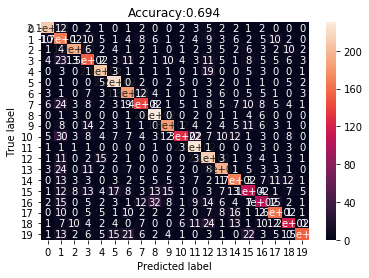

In [3]:
utils.fit_and_evaluate_model(data_dir, data_file, dimension_red="autoencoder")

## Results (with plain text)

The accuracy of the un-compressed classification model however was **72.65%** on training and **67.40%** on test.

Loaded 20000 rows with 20 distinct classes
Training model
Score on training data: 0.7264666666666667
Score on test data: 0.674
Classification report:
                                 precision    recall  f1-score   support

                  Category:Arts       0.70      0.90      0.78       250
               Category:Culture       0.62      0.49      0.55       253
             Category:Education       0.68      0.90      0.78       243
                Category:Events       0.63      0.47      0.54       247
             Category:Geography       0.76      0.75      0.75       252
                Category:Health       0.71      0.92      0.80       248
               Category:History       0.68      0.73      0.70       255
            Category:Humanities       0.67      0.57      0.61       253
              Category:Language       0.65      0.97      0.78       239
                   Category:Law       0.63      0.83      0.72       251
                  Category:Life       0.74    

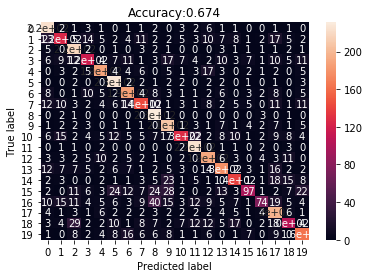

In [4]:
utils.fit_and_evaluate_model(data_dir, data_file, dimension_red="none")

## Results (PCA)

Using PCA to reduce dimensionality could still achieve **70.66%** on training and **66.54%** on test.

Loaded 20000 rows with 20 distinct classes
Training model
Score on training data: 0.7066
Score on test data: 0.6654
Classification report:
                                 precision    recall  f1-score   support

                  Category:Arts       0.71      0.86      0.78       238
               Category:Culture       0.55      0.48      0.51       240
             Category:Education       0.63      0.86      0.73       224
                Category:Events       0.71      0.48      0.57       235
             Category:Geography       0.82      0.72      0.76       284
                Category:Health       0.76      0.87      0.81       254
               Category:History       0.63      0.73      0.68       260
            Category:Humanities       0.68      0.53      0.60       246
              Category:Language       0.70      0.96      0.81       251
                   Category:Law       0.60      0.83      0.70       242
                  Category:Life       0.75      0.49     

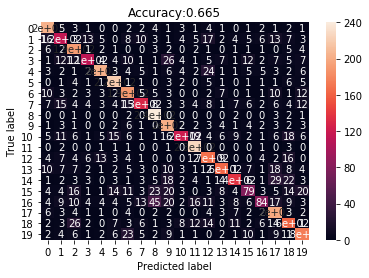

In [6]:
utils.fit_and_evaluate_model(data_dir, data_file, dimension_red="pca")

## Results (LSA)

Because PCA does not work with dense matrices I chose LSA for comparison purposes
(and in order to save the conversion of the sparse to a dense matrix.

Accuracies of **70.12%** on training and **66.78%** on test could be achieved - only a little less than PCA.

Loaded 20000 rows with 20 distinct classes
Training model
Score on training data: 0.7012
Score on test data: 0.6678
Classification report:
                                 precision    recall  f1-score   support

                  Category:Arts       0.66      0.93      0.77       246
               Category:Culture       0.69      0.46      0.55       243
             Category:Education       0.69      0.85      0.76       258
                Category:Events       0.77      0.45      0.57       245
             Category:Geography       0.81      0.76      0.79       258
                Category:Health       0.71      0.86      0.78       264
               Category:History       0.62      0.73      0.67       251
            Category:Humanities       0.65      0.51      0.57       247
              Category:Language       0.66      0.95      0.78       237
                   Category:Law       0.58      0.82      0.68       234
                  Category:Life       0.60      0.57     

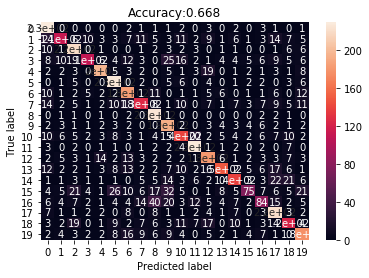

In [7]:
utils.fit_and_evaluate_model(data_dir, data_file, dimension_red="svd")

## Comparison

### Autoencoder vs. plain

I was very surprised that the classifier actually performed better on the compressed data (69.38% vs. 67.40%) which is a slight increase but still surprising. A possible explanation was that due to the the reconstruction with the autoencoder the learned features' separation may have improved and could thus be better separated by the classifier.

Looking at the confusion matrix and its "hot spots" (e.g. categories "Language" and "Reference" and "Politics" and "Law" that are supposed to be quite similar) there seems to be less confusion in the classification based on compressed data.


### Autoencoder vs. PCA

Not suprisingly a little accuracy was lost when performing PCA (69.38% (autoencoder) vs. 66.54%). As an autoencoder (with linear activation functions) is an approximation of PCA the better performance could be related to the reason stated above (better separation), being able to better model non-linearities which PCA is not able to.